# Plots the robot logs over time

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
import numpy as np
%matplotlib widget

## Plot a motor controller

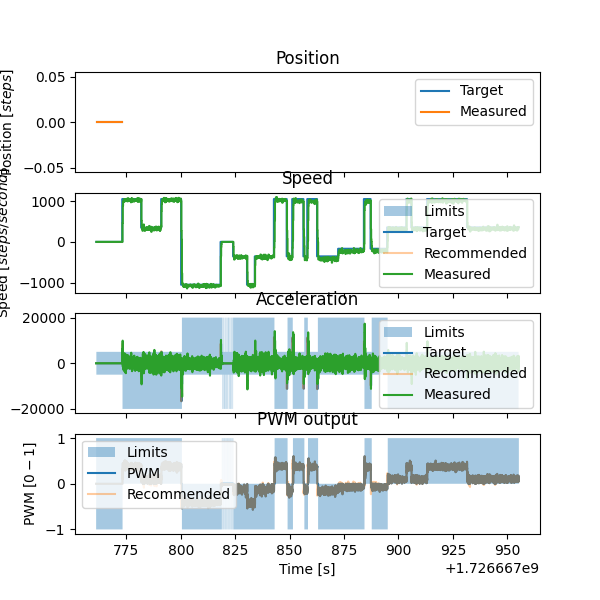

In [71]:
# Load data
# log_dir = "test"
log_dir = "left"
accel_df = pd.read_csv(f"{log_dir}/acceleration.csv")
speed_df = pd.read_csv(f"{log_dir}/speed.csv")
pos_df = pd.read_csv(f"{log_dir}/position.csv")


plt.close()
fig = plt.figure(figsize=[6,6])
# gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1])
# (ax_speed, ax_accel_windup), (ax_accel, ax_speed_windup), (ax_pwm, ax_pwm_windup) = gs.subplots(sharex=True)
gs = fig.add_gridspec(4, height_ratios=[1, 1, 1, 1])
ax_position, ax_speed, ax_accel, ax_pwm = gs.subplots(sharex=True)

# Plot pwm
ax_pwm.fill_between(accel_df["Timestamp [s]"].values, accel_df["Limit Min"].values, accel_df["Limit Max"].values, step="pre", alpha=0.4, label="Limits")
ax_pwm.step(accel_df["Timestamp [s]"].values, accel_df["Output"].values, label="PWM")
ax_pwm.step(accel_df["Timestamp [s]"].values, accel_df["Last Windup"].values + accel_df["Output"].values, alpha=0.4, label="Recommended")
# ax_pwm.step(accel_df["Timestamp [s]"].values, accel_df["Windup"].values, alpha=0.4, label="Windup")
ax_pwm.set_title("PWM output")
ax_pwm.set_ylabel("PWM [$0-1$]")
ax_pwm.set_xlabel("Time [s]")
ax_pwm.legend()
# ax_pwm.set_ylim((0,1))

# Plot acceleration
ax_accel.fill_between(speed_df["Timestamp [s]"].values, speed_df["Limit Min"].values, speed_df["Limit Max"].values, step="pre", alpha=0.4, label="Limits")
ax_accel.step(accel_df["Timestamp [s]"].values, accel_df["Target"].values, label="Target")
ax_accel.step(speed_df["Timestamp [s]"].values, speed_df["Last Windup"].values + speed_df["Output"].values, alpha=0.4, label="Recommended")
ax_accel.step(accel_df["Timestamp [s]"].values, accel_df["Current"].values, label="Measured")
ax_accel.set_title("Acceleration")
ax_accel.set_ylabel("Acceleration [$steps / second^2$]")
ax_accel.legend()

# Plot speed
ax_speed.fill_between(pos_df["Timestamp [s]"].values, pos_df["Limit Min"].values, pos_df["Limit Max"].values, step="pre", alpha=0.4, label="Limits")
ax_speed.step(speed_df["Timestamp [s]"].values, speed_df["Target"].values, label="Target")
ax_speed.step(pos_df["Timestamp [s]"].values, pos_df["Last Windup"].values + pos_df["Output"].values, alpha=0.4, label="Recommended")
ax_speed.step(speed_df["Timestamp [s]"].values, speed_df["Current"].values, label="Measured")
ax_speed.set_title("Speed")
ax_speed.set_ylabel("Speed [$steps / second$]")
ax_speed.legend()

# Plot position
ax_position.step(pos_df["Timestamp [s]"].values, pos_df["Target"].values, label="Target")
ax_position.step(pos_df["Timestamp [s]"].values, pos_df["Current"].values, label="Measured")
ax_position.set_title("Position")
ax_position.set_ylabel("Position [$steps$]")
ax_position.legend()

plt.show()

## Plot the robot position

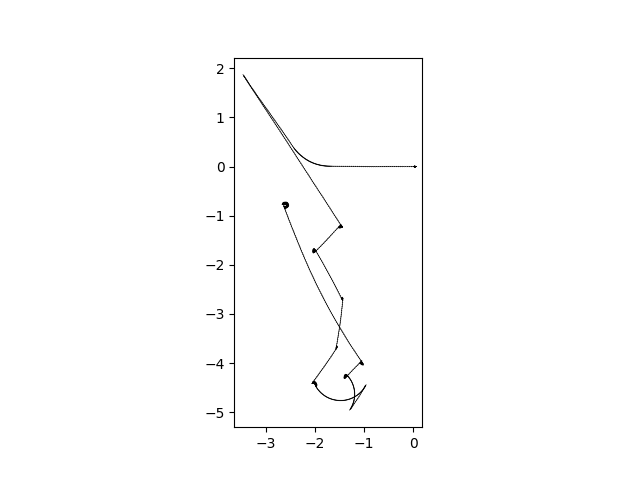

In [72]:
# Load data
log_file = "position.csv"
positions = pd.read_csv(log_file)
# positions = positions.iloc[::2, :] # Get every few rows

# Plot the positions
plt.close()
fig = plt.figure()
ax = fig.add_subplot()
plt.quiver(
    positions["X [m]"].values,
    positions["Y [m]"].values,
    abs(positions["Linear velocity [m/s]"].values),
    np.ones((1, len(positions))),
    angles=positions["Heading [rad]"].values * 180/np.pi,
    pivot='tail',
    scale=50
)
ax.set_aspect('equal', adjustable='box')
plt.show()

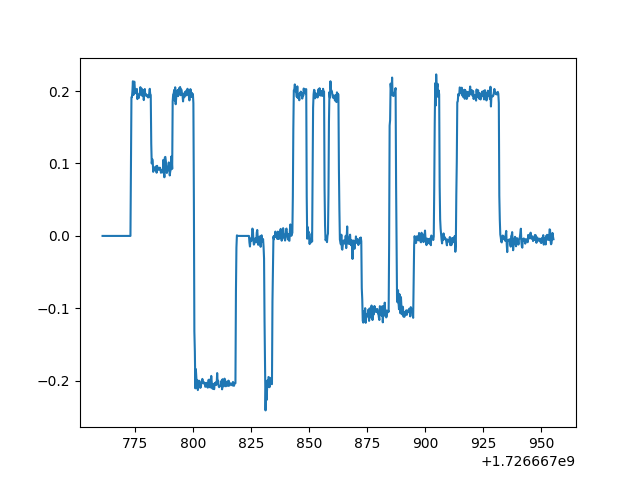

In [73]:
plt.close()
plt.figure()
plt.plot(
    positions["Timestamp [s]"].values,
    positions["Linear velocity [m/s]"].values
)
plt.show()

In [68]:
positions

,Timestamp [s],Forwards change [m],Sideways change [m],Heading change [rad],X [m],Y [m],Heading [rad],Angular velocity [rad/s],Rotation centre [m],Linear velocity [m/s]
0,1.726667e+09,0.000000,0.000000e+00,-0.000000,0.000000,0.000000,0.000000,-0.000000,inf,0.000000
1,1.726667e+09,0.000000,0.000000e+00,-0.000000,0.000000,0.000000,0.000000,-0.000000,inf,0.000000
2,1.726667e+09,0.000000,0.000000e+00,-0.000000,0.000000,0.000000,0.000000,-0.000000,inf,0.000000
3,1.726667e+09,0.000000,0.000000e+00,-0.000000,0.000000,0.000000,0.000000,-0.000000,inf,0.000000
4,1.726667e+09,0.000000,0.000000e+00,-0.000000,0.000000,0.000000,0.000000,-0.000000,inf,0.000000
...,...,...,...,...,...,...,...,...,...,...
397,1.726667e+09,-0.002167,9.874280e-08,-0.000091,-0.866764,1.096456,-7.049763,-0.004150,23.778036,0.098676
398,1.726667e+09,-0.002195,5.632242e-07,-0.000513,-0.882473,1.111611,-7.051798,-0.024209,4.276516,0.103530
399,1.726667e+09,-0.002089,-5.828716e-08,0.000056,-0.898188,1.126839,-7.053987,0.002609,-37.448261,0.097699
400,1.726667e+09,-0.002092,3.869493e-07,-0.000370,-0.913506,1.141735,-7.055490,-0.017267,5.657638,0.097689
